In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('open_ave_data.csv')
data

,Unnamed: 0,ReportText,findings,clinicaldata,ExamName,impression
0,0,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: Cough. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...,IMPRESSION: Normal 2-view chest radiography.
1,1,EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: CHEST PAIN. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...,IMPRESSION: No acute cardiopulmonary abnormali...
2,2,EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: CHEST PAIN. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...,IMPRESSION: No acute cardiopulmonary process.
3,3,Exam: - CHEST-PORTABLE History: Chest pain Com...,Findings: Heart size appears normal. Lungs cle...,History: Chest pain \n\n,Exam: - CHEST-PORTABLE\n\nComparison: None,Impression: Lungs clear
4,4,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/17/2021 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,"CLINICAL HISTORY: CHEST PAIN, SHORTNESS OF BRE...",EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/17/2021 ...,IMPRESSION: Normal single view chest.
...,...,...,...,...,...,...
949,982,CHEST RADIOGRAPH: PA and Lateral views HISTORY...,LUNGS: The lung fields demonstrate normal degr...,HISTORY: R05 Cough \n\n,CHEST RADIOGRAPH: PA and Lateral views\n\nCOMP...,IMPRESSION: No acute pulmonary disease.
950,983,EXAM DESCRIPTION: X-ray single view chest. CLI...,FINDINGS: The lungs are well expanded and are ...,"CLINICAL HISTORY: 68 years Male, SOB \n\n",EXAM DESCRIPTION: X-ray single view chest.\n\n...,IMPRESSION: No evidence of acute intrathoracic...
951,984,EXAM: CHEST RADIOGRAPHY EXAM DATE: 04/02/2018 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: Chest pain. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 04/02/2018 ...,IMPRESSION: Normal single view chest.
952,985,EXAM: XR CHEST 1 VW HISTORY: chest pain TECHNI...,FINDINGS: Lines and tubes: None Cardiomediasti...,HISTORY: chest pain \n\n,EXAM: XR CHEST 1 VW\n\nTECHNIQUE: Chest AP vie...,IMPRESSION: No acute cardiopulmonary process D...


Histograms of character length for each of the four report fields

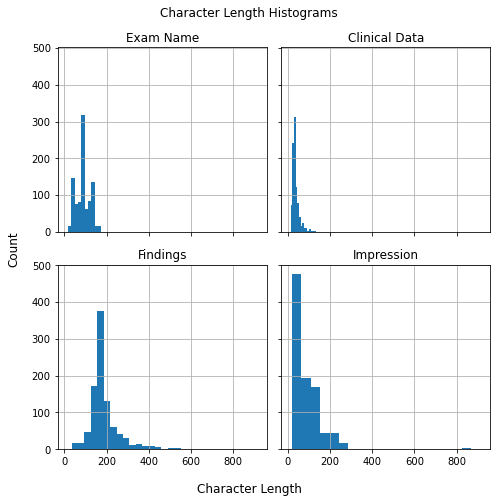

In [3]:
fig, axs = plt.subplots(2,2,figsize=(7,7),sharex=True, sharey=True)

data['ExamName'].str.len().hist(ax=axs[0,0],bins=20)
axs[0, 0].set_title("Exam Name")

data['clinicaldata'].str.len().hist(ax=axs[0,1],bins=20)
axs[0, 1].set_title("Clinical Data")

data['findings'].str.len().hist(ax=axs[1,0],bins=20)
axs[1, 0].set_title("Findings")

data['impression'].str.len().hist(ax=axs[1,1],bins=20)
axs[1, 1].set_title("Impression")

fig.supxlabel('Character Length')
fig.supylabel('Count')
plt.suptitle('Character Length Histograms')
plt.tight_layout()

According to the graphs, exam name and clinical data show the least spread, meaning that their fields' character lengths are more similar than those of findings and impressions. Exam Name is comprised of strings with around 100+ characters, while clinical data strings are often less than 100 characters. Findings and impressions have greater spread, with findings having the greatest amount of characters on average compared to the other fields. Most impressions are fewer than 200 characters, with some strings being greater (note few outliers with more than 800 characters).

Histograms of number of words in each field

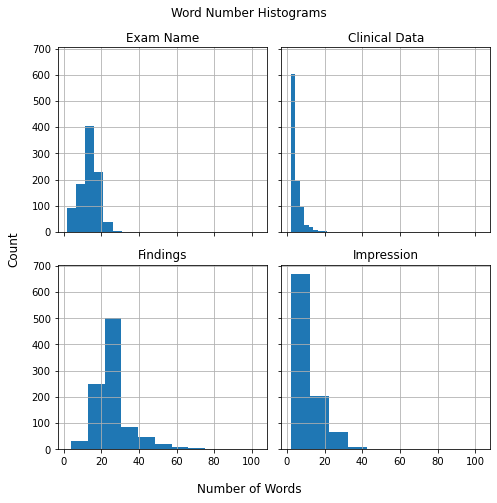

In [4]:
fig, axs = plt.subplots(2,2,figsize=(7,7),sharex=True, sharey=True)

data['ExamName'].str.split().map(lambda x: len(x)).hist(ax=axs[0,0])
axs[0, 0].set_title("Exam Name")

#must dropna here because 4 records are missing/NaN
data['clinicaldata'].dropna().str.split().map(lambda x: len(x)).hist(ax=axs[0,1])
axs[0, 1].set_title("Clinical Data")

data['findings'].str.split().map(lambda x: len(x)).hist(ax=axs[1,0])
axs[1, 0].set_title("Findings")

data['impression'].str.split().map(lambda x: len(x)).hist(ax=axs[1,1])
axs[1, 1].set_title("Impression")

fig.supxlabel('Number of Words')
fig.supylabel('Count')
plt.suptitle('Word Number Histograms')
plt.tight_layout()

The findings field has the greatest spread, and thus the greatest variation in number of words. This corresponds to the variation in character length seen in the character length histograms. The average word count for findings is around 20-30 words. On the other hand, the exam name field is largely less than 20 words on average. Clinical Data is a short field with most examples being fewer than 10 words. The impression field is mostly less than 20 words, with the majority of examples being less than 15 words.

Average word length histograms

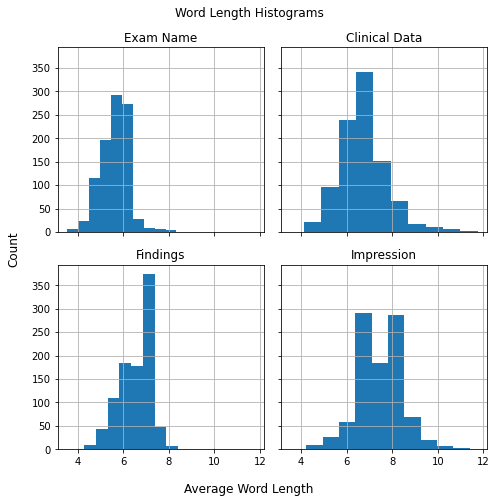

In [5]:
fig, axs = plt.subplots(2,2,figsize=(7,7),sharex=True, sharey=True)

data['ExamName'].str.split().apply(\
    lambda x : [len(i) for i in x]).map(\
    lambda x: np.mean(x)).hist(ax=axs[0,0])
axs[0, 0].set_title("Exam Name")

#must dropna here because 4 records are missing/NaN
data['clinicaldata'].dropna().str.split().apply(\
    lambda x : [len(i) for i in x]).map(\
    lambda x: np.mean(x)).hist(ax=axs[0,1])
axs[0, 1].set_title("Clinical Data")

data['findings'].str.split().apply(\
    lambda x : [len(i) for i in x]).map(\
    lambda x: np.mean(x)).hist(ax=axs[1,0])
axs[1, 0].set_title("Findings")

data['impression'].str.split().apply(\
    lambda x : [len(i) for i in x]).map(\
    lambda x: np.mean(x)).hist(ax=axs[1,1])
axs[1, 1].set_title("Impression")

fig.supxlabel('Average Word Length')
fig.supylabel('Count')
plt.suptitle('Word Length Histograms')
plt.tight_layout()

Most examples of exam name have words that are less than 7 words long with around 5-6 letters in the average word. Clinical data and findings both have an average of around 7 letters per word. Impression seems to have the most examples with longer average word lengths (>8), but since a significant number of impressions have less than 7 average letters in each word, the average word length of impression examples seems to be around 7. 

Additionally, the exam name and findings field seem to be favoring smaller average word lengths while clinical data and impressions seem to have a higher overall count of longer average word lengths.

Stopwords often add no information to the text data to be analyzed, but were included in our prior summary statistics. Removing stopwords can lead to greater insights on our data.

In [6]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

In [7]:
#Creating corpus for each section 

namecorpus=[]
mots = data['ExamName'].str.split()
mots = mots.values.tolist()
namecorpus = [word for i in mots for word in i]

findcorpus=[]
mots = data['findings'].str.split()
mots = mots.values.tolist()
findcorpus = [word for i in mots for word in i]

clincorpus=[]
mots = data['clinicaldata'].dropna().str.split()
mots = mots.values.tolist()
clincorpus = [word for i in mots for word in i]

impcorpus=[]
mots = data['impression'].str.split()
mots = mots.values.tolist()
impcorpus = [word for i in mots for word in i]

In [8]:
#Creating stopwords dictionary for each section

from collections import defaultdict


namedic=defaultdict(int)
for word in namecorpus:
    if word in stop:
        namedic[word]+=1

finddic=defaultdict(int)
for word in findcorpus:
    if word in stop:
        finddic[word]+=1

clindic=defaultdict(int)
for word in clincorpus:
    if word in stop:
        clindic[word]+=1

impdic=defaultdict(int)
for word in impcorpus:
    if word in stop:
        impdic[word]+=1

Now we can plot the most common stopwords and non stopwords in each section

In [9]:
from collections import Counter
import seaborn as sns

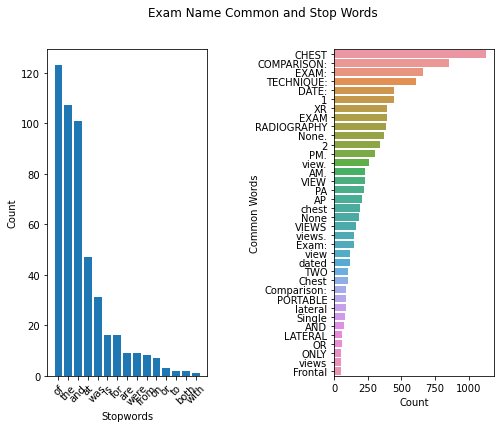

In [10]:
#Exam Name

fig, axs = plt.subplots(1,2,gridspec_kw={'width_ratios': [1,1],'wspace':.8},figsize=(8,6))

top = sorted(namedic.items(), key= lambda x:x[1],reverse=True)[:15] 
x,y=zip(*top)
axs[0].bar(x,y)
axs[0].set_xlabel('Stopwords')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

counter=Counter(namecorpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)


sns.barplot(x=y,y=x,ax=axs[1])
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Common Words',labelpad=-5)

plt.suptitle('Exam Name Common and Stop Words')
plt.show()

'Of, 'the, and 'and' are the three most common stopwords in the exam name field. 'Chest', 'comparison', and 'exam' are the three most common non-stopwords in the field.

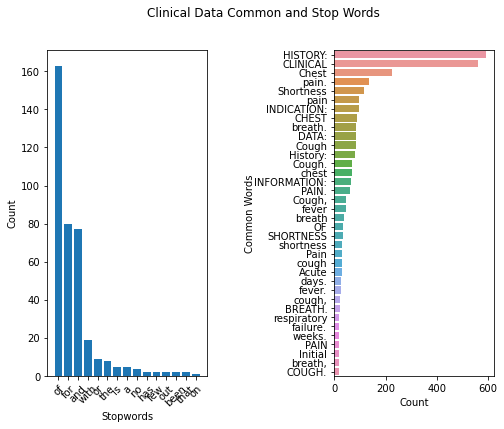

In [11]:
#Clinical data

fig, axs = plt.subplots(1,2,gridspec_kw={'width_ratios': [1,1],'wspace':.8},figsize=(8,6))

top = sorted(clindic.items(), key= lambda x:x[1],reverse=True)[:15] 
x,y=zip(*top)
axs[0].bar(x,y)
axs[0].set_xlabel('Stopwords')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

counter=Counter(clincorpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x,ax=axs[1])
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Common Words',labelpad=-1)

plt.suptitle('Clinical Data Common and Stop Words')
plt.show()

'Of, 'for, and 'and' are the three most common stopwords in the exam name field. 'History', 'clinical', and 'chest' are the three most common non-stopwords in the field. History likely reflects the nature of the field, as it includes the patient's past medical history.

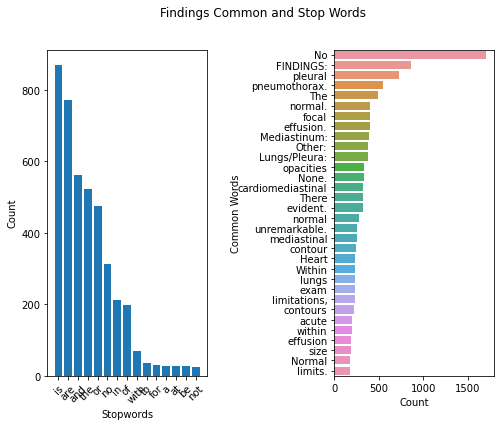

In [12]:
#Findings

fig, axs = plt.subplots(1,2,gridspec_kw={'width_ratios': [1,1],'wspace':.8},figsize=(8,6))

top = sorted(finddic.items(), key= lambda x:x[1],reverse=True)[:15] 
x,y=zip(*top)
axs[0].bar(x,y)
axs[0].set_xlabel('Stopwords')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

counter=Counter(findcorpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x,ax=axs[1])
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Common Words',labelpad=-3)

plt.suptitle('Findings Common and Stop Words')
plt.show()

'Is, 'are, and 'and' are the three most common stopwords in the exam name field. 'No', 'findings:', and 'pleural' are the three most common non-stopwords in the field. 'No' probably reflects the lack of a certain finding in the patient's radiology images.

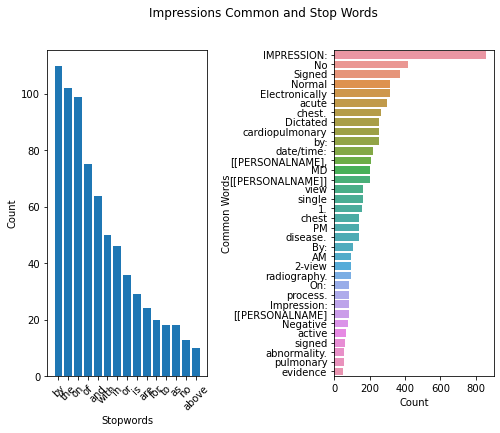

In [13]:
#Impressions

fig, axs = plt.subplots(1,2,gridspec_kw={'width_ratios': [1,1],'wspace':.8},figsize=(8,6))

top = sorted(impdic.items(), key= lambda x:x[1],reverse=True)[:15] 
x,y=zip(*top)
axs[0].bar(x,y)
axs[0].set_xlabel('Stopwords')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

counter=Counter(impcorpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x,ax=axs[1])
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Common Words',labelpad=-3)

plt.suptitle('Impressions Common and Stop Words')
plt.show()

'By, 'the, and 'on' are the three most common stopwords in the exam name field. 'Impression', 'No', and 'Signed' are the three most common non-stopwords in the field. The word 'impression' is likely the field header, while signed represents the signature of the medical professional providing the impression.

Now we will perform n-gram exploration

In [14]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
def get_top_ngram(corpus,n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit((corpus))
    bag_of_words = vec.transform((corpus))
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
            for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [16]:
examname = data['ExamName']
clindata = data['clinicaldata'].dropna()
findings = data['findings']
impression = data['impression']

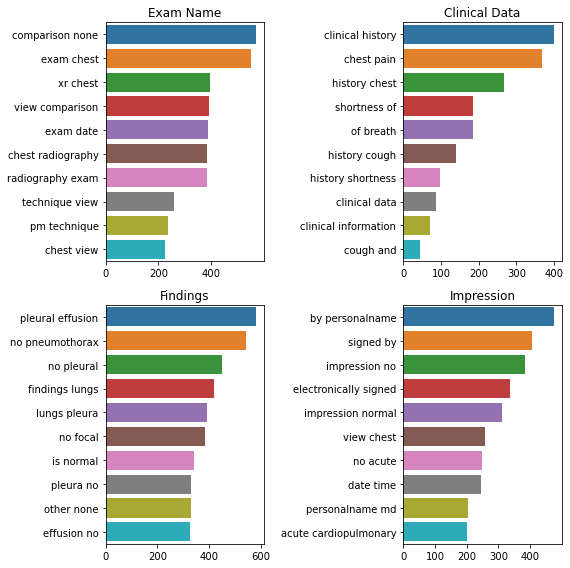

In [17]:
fig, axes = plt.subplots(2,2)

axes[0,0].set_title('Exam Name')
axes[0,1].set_title('Clinical Data')
axes[1,0].set_title('Findings')
axes[1,1].set_title('Impression')

#Exam Name
top_n_bigrams=get_top_ngram(examname,2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(ax=axes[0,0],x=y,y=x)

#Clinical Data
top_n_bigrams=get_top_ngram(clindata,2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(ax=axes[0,1],x=y,y=x)

#Findings
top_n_bigrams=get_top_ngram(findings,2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(ax=axes[1,0],x=y,y=x)

#Impression
top_n_bigrams=get_top_ngram(impression,2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(ax=axes[1,1],x=y,y=x)

fig.set_figheight(8)
fig.set_figwidth(8)
fig.tight_layout()
plt.show()

These bigrams show which 2 words are most paired together in each of the four report sections. The exam name bigrams focus on the type of exam conducted. The clinical data bigrams focus on the medical history of the patient. The findings section bigrams show various pathological findings (and the lack thereof) found in radiological imaging. Finally, the impression section bigrams include signatures and redacted personal names, showing the final medical determination provided by the medical professional.

Moving onto topic modeling exploration with pyLDAvis.

In [18]:
import nltk
from nltk import word_tokenize, PorterStemmer, WordNetLemmatizer, punkt, wordnet
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ambro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ambro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ambro\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [19]:
#Preprocessing by tokenizing, lemmatizing, and removing stopwords

def preprocess(section):
    corpus= []
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for chunk in section:
        words=[w for w in word_tokenize(chunk) if (w not in stop)]
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        corpus.append(words)
    return corpus

exnamecorpus=preprocess(examname)
clincorpus =preprocess(clindata)
findcorpus=preprocess(findings)
impcorpus=preprocess(impression)

In [20]:
#Creating a bag of words for each section

import gensim

exnamedic=gensim.corpora.Dictionary(exnamecorpus)
bow_exnamecorpus = [exnamedic.doc2bow(doc) for doc in exnamecorpus]

clindic=gensim.corpora.Dictionary(clincorpus)
bow_clincorpus = [clindic.doc2bow(doc) for doc in clincorpus]

finddic=gensim.corpora.Dictionary(findcorpus)
bow_findcorpus = [finddic.doc2bow(doc) for doc in findcorpus]

impdic=gensim.corpora.Dictionary(impcorpus)
bow_impcorpus = [impdic.doc2bow(doc) for doc in impcorpus]

In [21]:
#Exam Name

exnamelda_model = gensim.models.LdaMulticore(bow_exnamecorpus, 
num_topics = 4, 
id2word = exnamedic,                                    
passes = 10,
workers = 2)
exnamelda_model.show_topics()

[(0,
  '0.160*"EXAM" + 0.087*"CHEST" + 0.087*"view" + 0.084*"TECHNIQUE" + 0.079*"RADIOGRAPHY" + 0.079*"COMPARISON" + 0.077*"DATE" + 0.061*"None" + 0.006*"PORTABLE" + 0.003*"Chest"'),
 (1,
  '0.135*"CHEST" + 0.081*"COMPARISON" + 0.058*"VIEWS" + 0.049*"EXAM" + 0.037*"TWO" + 0.037*"dated" + 0.034*"TECHNIQUE" + 0.027*"chest" + 0.025*"VIEW" + 0.025*"lateral"'),
 (2,
  '0.050*"CHEST" + 0.047*"COMPARISON" + 0.046*"Chest" + 0.045*"Exam" + 0.042*"chest" + 0.041*"view" + 0.039*"DATE" + 0.036*"Comparison" + 0.035*"Single" + 0.034*"VIEW"'),
 (3,
  '0.118*"CHEST" + 0.117*"EXAM" + 0.090*"COMPARISON" + 0.075*"None" + 0.063*"TECHNIQUE" + 0.056*"view" + 0.045*"DATE" + 0.038*"VIEW" + 0.036*"RADIOGRAPHY" + 0.022*"chest"')]

In [22]:
#Clinical Data

clinlda_model = gensim.models.LdaMulticore(bow_clincorpus, 
num_topics = 4, 
id2word = clindic,                                    
passes = 10,
workers = 2)
clinlda_model.show_topics()

[(0,
  '0.183*"pain" + 0.170*"Chest" + 0.133*"HISTORY" + 0.119*"CLINICAL" + 0.043*"INDICATION" + 0.038*"chest" + 0.031*"History" + 0.014*"cough" + 0.014*"INFORMATION" + 0.009*"Indication"'),
 (1,
  '0.239*"HISTORY" + 0.180*"CLINICAL" + 0.073*"Shortness" + 0.066*"breath" + 0.054*"CHEST" + 0.053*"PAIN" + 0.023*"Pain" + 0.022*"cough" + 0.021*"SHORTNESS" + 0.021*"BREATH"'),
 (2,
  '0.195*"Cough" + 0.099*"CLINICAL" + 0.087*"fever" + 0.052*"INFORMATION" + 0.043*"INDICATION" + 0.037*"week" + 0.035*"DATA" + 0.032*"day" + 0.027*"breath" + 0.026*"shortness"'),
 (3,
  '0.093*"HISTORY" + 0.060*"Acute" + 0.055*"failure" + 0.051*"DATA" + 0.049*"CLINICAL" + 0.045*"encounter" + 0.042*"respiratory" + 0.035*"acute" + 0.029*"chest" + 0.027*"Initial"')]

In [23]:
#Findings

findlda_model = gensim.models.LdaMulticore(bow_findcorpus, 
num_topics = 4, 
id2word = finddic,                                    
passes = 10,
workers = 2)
findlda_model.show_topics()

[(0,
  '0.079*"The" + 0.058*"normal" + 0.040*"FINDINGS" + 0.038*"size" + 0.038*"lung" + 0.032*"within" + 0.032*"There" + 0.032*"clear" + 0.031*"limit" + 0.030*"effusion"'),
 (1,
  '0.061*"pneumothorax" + 0.060*"effusion" + 0.060*"FINDINGS" + 0.060*"pleural" + 0.046*"contour" + 0.046*"Mediastinum" + 0.045*"Lungs/Pleura" + 0.045*"Other" + 0.044*"focal" + 0.043*"opacity"'),
 (2,
  '0.041*"tube" + 0.025*"pneumothorax" + 0.023*"FINDINGS" + 0.021*"left" + 0.019*"tip" + 0.019*"stable" + 0.018*"right" + 0.018*"effusion" + 0.018*"pleural" + 0.016*"There"'),
 (3,
  '0.051*"Normal" + 0.041*"FINDINGS" + 0.032*"pulmonary" + 0.026*"silhouette" + 0.023*"abnormality" + 0.020*"infiltrate" + 0.019*"mass" + 0.018*"pleural" + 0.018*"significant" + 0.017*"cardiomediastinal"')]

In [24]:
#Impression

implda_model = gensim.models.LdaMulticore(bow_impcorpus, 
num_topics = 4, 
id2word = impdic,                                    
passes = 10,
workers = 2)
implda_model.show_topics()

[(0,
  '0.118*"Dictated" + 0.099*"date/time" + 0.089*"PERSONALNAME" + 0.080*"Signed" + 0.067*"Electronically" + 0.038*"Impression" + 0.037*"acute" + 0.031*"IMPRESSION" + 0.021*"cardiopulmonary" + 0.018*"CDT"'),
 (1,
  '0.125*"acute" + 0.120*"IMPRESSION" + 0.099*"cardiopulmonary" + 0.055*"process" + 0.054*"PERSONALNAME" + 0.038*"disease" + 0.025*"abnormality" + 0.025*"Electronically" + 0.021*"evidence" + 0.020*"signed"'),
 (2,
  '0.150*"IMPRESSION" + 0.133*"chest" + 0.105*"Normal" + 0.054*"view" + 0.052*"single" + 0.051*"PERSONALNAME" + 0.037*"Signed" + 0.030*"2-view" + 0.030*"radiography" + 0.022*"Electronically"'),
 (3,
  '0.073*"IMPRESSION" + 0.048*"PERSONALNAME" + 0.038*"Signed" + 0.033*"Electronically" + 0.022*"M.D" + 0.022*"disease" + 0.015*"opacity" + 0.015*"consolidation" + 0.014*"lung" + 0.013*"effusion"')]

In [74]:
#%pip install pyldavis
import pyLDAvis
import pyLDAvis.gensim_models
from importlib import reload
from IPython.core.display import HTML

In [75]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [89]:
pyLDAvis.enable_notebook(local=True)

In [90]:
#Exam Name

vis = pyLDAvis.gensim_models.prepare(exnamelda_model, bow_exnamecorpus, exnamedic)
pyLDAvis.save_html(vis,'lda1.html')
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.045550  0.027286       1        1  28.972331
0      0.123562  0.048525       2        1  28.579379
1     -0.011475 -0.131287       3        1  24.360776
2     -0.157638  0.055477       4        1  18.087514, topic_info=           Term        Freq       Total Category  logprob  loglift
41        VIEWS  142.000000  142.000000  Default  30.0000  30.0000
7   RADIOGRAPHY  343.000000  343.000000  Default  29.0000  29.0000
5          EXAM  931.000000  931.000000  Default  28.0000  28.0000
82          TWO   90.000000   90.000000  Default  27.0000  27.0000
63        Chest  111.000000  111.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
3    COMPARISON   83.748008  756.655155   Topic4  -3.0593  -0.4911
2         CHEST   89.630379  999.174311   Topic4  -2.9914  -0.7013
6          None   51.783873  496.400198   Topic4  -3.5400  -0.5504
8     TECHNIQUE   45.403359  543.517463   Topic4  -3.6715  -0.7725
5          EXAM   26.419855  931.414983   Topic4  -4.2130  -1.8526

[240 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
966       2  0.732795       01:06
448       2  0.822595       01:13
376       3  0.868894  02/16/2018
202       3  0.769343  02/18/2018
203       3  0.769311  02/20/2018
...     ...       ...         ...
9         3  0.089290        view
9         4  0.138685        view
118       1  0.026018       x-ray
118       3  0.520352       x-ray
118       4  0.442299       x-ray

[249 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 3])

In [91]:
#Clinical Data

vis = pyLDAvis.gensim_models.prepare(clinlda_model, bow_clincorpus, clindic)
pyLDAvis.save_html(vis,'lda2.html')
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.073130 -0.175942       1        1  34.530711
0     -0.101713 -0.013498       2        1  28.851586
2      0.269417  0.010101       3        1  23.358335
3     -0.094574  0.179339       4        1  13.259368, topic_info=         Term        Freq       Total Category  logprob  loglift
1       Cough  200.000000  200.000000  Default  30.0000  30.0000
5       Chest  201.000000  201.000000  Default  29.0000  29.0000
7        pain  224.000000  224.000000  Default  28.0000  28.0000
2     HISTORY  536.000000  536.000000  Default  27.0000  27.0000
49      fever   82.000000   82.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
67   Clinical    3.466950   12.410813   Topic4  -5.0321   0.7452
90    surgery    3.304167   11.642714   Topic4  -5.0801   0.7610
51  shortness    3.629973   30.668068   Topic4  -4.9861  -0.1135
32      cough    3.396929   68.255873   Topic4  -5.0525  -0.9799
24     breath    3.466936  127.959372   Topic4  -5.0321  -1.5880

[210 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
66        1  0.501411  ADDITIONAL
66        2  0.501411  ADDITIONAL
129       3  0.681987         AND
63        4  0.981612       Acute
8         1  0.980736      BREATH
...     ...       ...         ...
116       3  0.626926    wheezing
18        2  0.828655     without
56        1  0.105867        year
56        2  0.317602        year
56        3  0.529336        year

[211 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 4])

In [92]:
#Findings

vis = pyLDAvis.gensim_models.prepare(findlda_model, bow_findcorpus, finddic)
pyLDAvis.save_html(vis,'lda3.html')
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.222332 -0.092744       1        1  39.671328
0     -0.065984  0.177691       2        1  33.076260
2      0.123044 -0.121818       3        1  15.817237
3      0.165272  0.036871       4        1  11.435175, topic_info=            Term        Freq       Total Category  logprob  loglift
48           The  514.000000  514.000000  Default  30.0000  30.0000
5         Normal  226.000000  226.000000  Default  29.0000  29.0000
4           None  300.000000  300.000000  Default  28.0000  28.0000
9        evident  285.000000  285.000000  Default  27.0000  27.0000
2   Lungs/Pleura  341.000000  341.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
84    adenopathy   18.354826   78.187526   Topic4  -4.7151   0.7193
62          tube   18.218860  140.295425   Topic4  -4.7225   0.1272
91        change   16.138333   53.775021   Topic4  -4.8438   0.9649
17         There   16.856371  324.783619   Topic4  -4.8002  -0.7900
14  pneumothorax   17.036345  649.510703   Topic4  -4.7896  -1.4724

[245 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
285       1  0.072392      BONES
285       4  0.941092      BONES
131       2  0.238162      Bones
131       4  0.714486      Bones
78        2  0.983120       Both
...     ...       ...        ...
82        3  0.014887     within
302       1  0.053937    without
302       2  0.916933    without
302       3  0.053937    without
540       2  0.809545  yesterday

[398 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 4])

In [93]:
#Impressions

vis = pyLDAvis.gensim_models.prepare(implda_model, bow_impcorpus, impdic)
pyLDAvis.save_html(vis,'lda4.html')
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.224636  0.006566       1        1  32.322978
0      0.116397  0.118775       2        1  25.051154
3      0.076669 -0.186106       3        1  24.013741
1      0.031571  0.060765       4        1  18.612127, topic_info=           Term        Freq       Total Category  logprob  loglift
3         chest  338.000000  338.000000  Default  30.0000  30.0000
28     Dictated  234.000000  234.000000  Default  29.0000  29.0000
2        Normal  266.000000  266.000000  Default  28.0000  28.0000
37    date/time  195.000000  195.000000  Default  27.0000  27.0000
6         acute  276.000000  276.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
90   identified    4.512149   12.419707   Topic4  -5.7777   0.6688
20       Signed   10.957999  331.575207   Topic4  -4.8904  -1.7284
62    Date/Time    5.042346   23.161354   Topic4  -5.6666   0.1567
283      carina    3.363456    7.474896   Topic4  -6.0715   0.8828
57          CDT    3.444059   40.302111   Topic4  -6.0478  -0.7784

[230 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
91        1  0.889046  01/27/2019
681       4  0.720251  01/30/2020
305       4  0.720699  02/02/2019
717       4  0.720633  02/14/2020
33        4  0.860162  02/24/2019
...     ...       ...         ...
17        3  0.854428      volume
471       2  0.837493     wording
131       1  0.815820       x-ray
131       2  0.062755       x-ray
131       3  0.062755       x-ray

[287 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2])

The four LDA plots show different topic distributions for each section. The larger the circle, the greater the representation of the data. The space between the circles reflect the similarity between the topics. When the circles overlap, there is a high level of similarity between the different topics. 

The topics are based on the words in the fields as well as the frequency of them. Hovering over the different words will temporarily change the topic sizes to demonstrate which topics are most affected by the words and to what extent. Knowing the similarity between the entries in each field can assist with classification as the features characterizing the a large percentage of examples in the field can be separated from features that do not.

Wordclouds

In [31]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

In [32]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

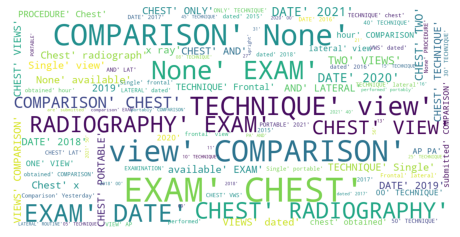

In [33]:
#Exam Name

show_wordcloud(exnamecorpus)

Exam Name's most common/significant words include 'exam', 'comparison', and 'radiography'. These words highlight the type of radiology imagery that will be conducted for the patient.

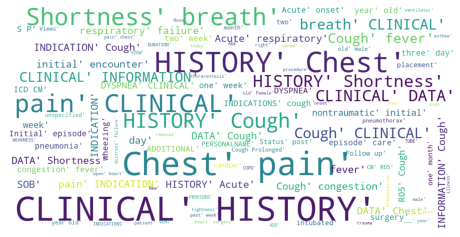

In [34]:
#Clinical Data

show_wordcloud(clincorpus)

Clinical Data's most common/significant words include 'clinical', 'history', 'shortness', 'chest', 'pain', etc. These words demonstrate the varied types of medical histories bringing patients to pursue radiological imagery.

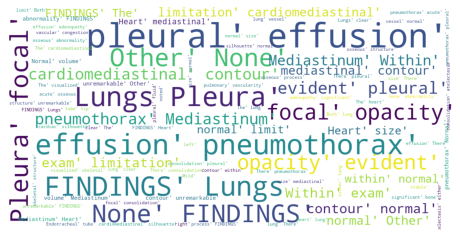

In [35]:
#Findings Data

show_wordcloud(findcorpus)

Findings' most common/significant words include 'pleural', 'lungs', 'findings', 'effusion', etc. These words reflect what medical information is found in the radiological imaging.

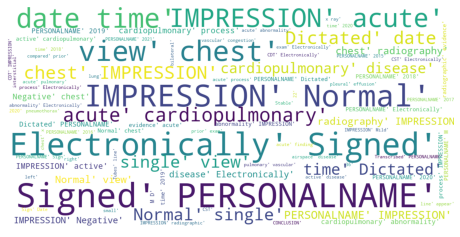

In [36]:
#Impressions

show_wordcloud(impcorpus)

Impression's most common/significant words include 'Impression','Normal','Electronically','Signed','Personalname','acute',etc. This is the medical determination that is also signed by a medical professional.

Text Complexity Exploration

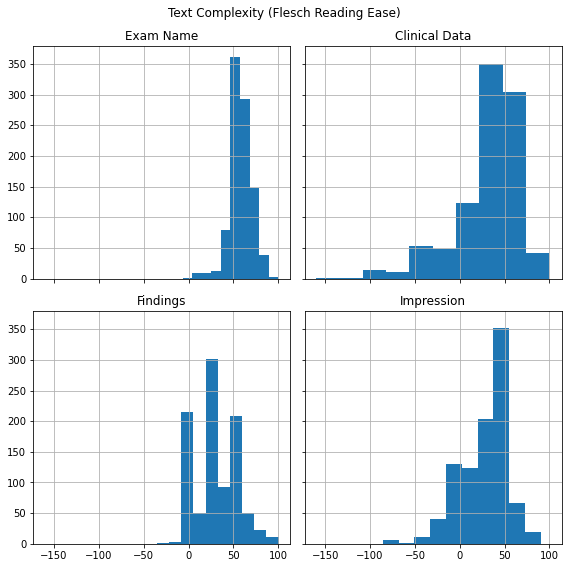

In [37]:
#%pip install textstat
from textstat import flesch_reading_ease, automated_readability_index

fig, axes = plt.subplots(2,2,sharex='all', sharey='all')

axes[0,0].set_title('Exam Name')
axes[0,1].set_title('Clinical Data')
axes[1,0].set_title('Findings')
axes[1,1].set_title('Impression')

#Exam Name
examname.apply(lambda x : flesch_reading_ease(x)).hist(ax=axes[0,0])

#Clinical Data
clindata.apply(lambda x : flesch_reading_ease(x)).hist(ax=axes[0,1])

#Findings
findings.apply(lambda x : flesch_reading_ease(x)).hist(ax=axes[1,0])

#Impression
impression.apply(lambda x : flesch_reading_ease(x)).hist(ax=axes[1,1])

fig.set_figheight(8)
fig.set_figwidth(8)
plt.suptitle('Text Complexity (Flesch Reading Ease)')
fig.tight_layout()
plt.show()

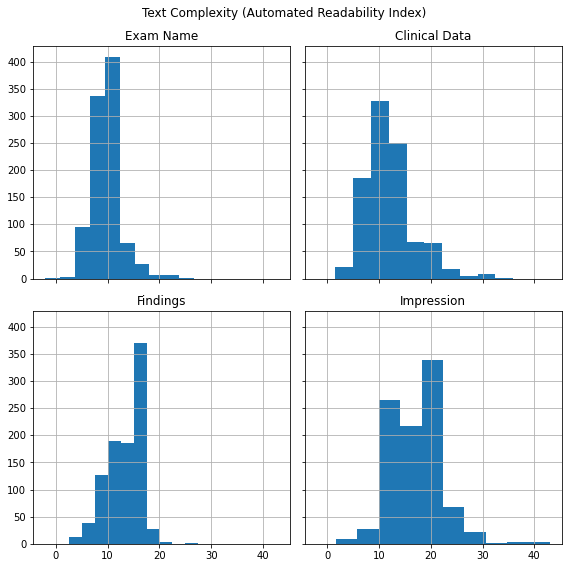

In [38]:
fig, axes = plt.subplots(2,2,sharex='all', sharey='all')

axes[0,0].set_title('Exam Name')
axes[0,1].set_title('Clinical Data')
axes[1,0].set_title('Findings')
axes[1,1].set_title('Impression')

#Exam Name
examname.apply(lambda x : automated_readability_index(x)).hist(ax=axes[0,0])

#Clinical Data
clindata.apply(lambda x : automated_readability_index(x)).hist(ax=axes[0,1])

#Findings
findings.apply(lambda x : automated_readability_index(x)).hist(ax=axes[1,0])

#Impression
impression.apply(lambda x : automated_readability_index(x)).hist(ax=axes[1,1])

fig.set_figheight(8)
fig.set_figwidth(8)
plt.suptitle('Text Complexity (Automated Readability Index)')
fig.tight_layout()
plt.show()

Using both readability indexes, Clinical Data and Impressions have a greater number of difficult text than exam name and findings. Exam Name seems to be the easiest to read, which makes sense because it is very general information and lacks as much medical terminology as other sections.

In [39]:
%store exnamecorpus
%store clincorpus
%store findcorpus
%store impcorpus

Stored 'exnamecorpus' (list)
Stored 'clincorpus' (list)
Stored 'findcorpus' (list)
Stored 'impcorpus' (list)


In [40]:
%store -z